In [8]:
from pyspark.sql import SparkSession
import pandas as pd

In [2]:
spark=SparkSession.builder.appName('champi').getOrCreate()

23/02/02 11:50:59 WARN Utils: Your hostname, PC-FlorianM resolves to a loopback address: 127.0.1.1; using 10.25.1.29 instead (on interface wlp2s0)
23/02/02 11:50:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/02 11:50:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/02/02 11:51:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [38]:
df = spark.read.csv('../Data/mushrooms.csv',header=True,inferSchema=True)

In [5]:
from pyspark.sql.functions import when, count, col, isnull

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show(vertical=True)

-RECORD 0-----------------------
 class                    | 0   
 cap-shape                | 0   
 cap-surface              | 0   
 cap-color                | 0   
 bruises                  | 0   
 odor                     | 0   
 gill-attachment          | 0   
 gill-spacing             | 0   
 gill-size                | 0   
 gill-color               | 0   
 stalk-shape              | 0   
 stalk-root               | 0   
 stalk-surface-above-ring | 0   
 stalk-surface-below-ring | 0   
 stalk-color-above-ring   | 0   
 stalk-color-below-ring   | 0   
 veil-type                | 0   
 veil-color               | 0   
 ring-number              | 0   
 ring-type                | 0   
 spore-print-color        | 0   
 population               | 0   
 habitat                  | 0   



In [13]:
#from pyspark.sql.functions import isNull
print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

TypeError: unexpected item type: <class 'function'>

# ML stuff

In [14]:
import matplotlib.pyplot as plt

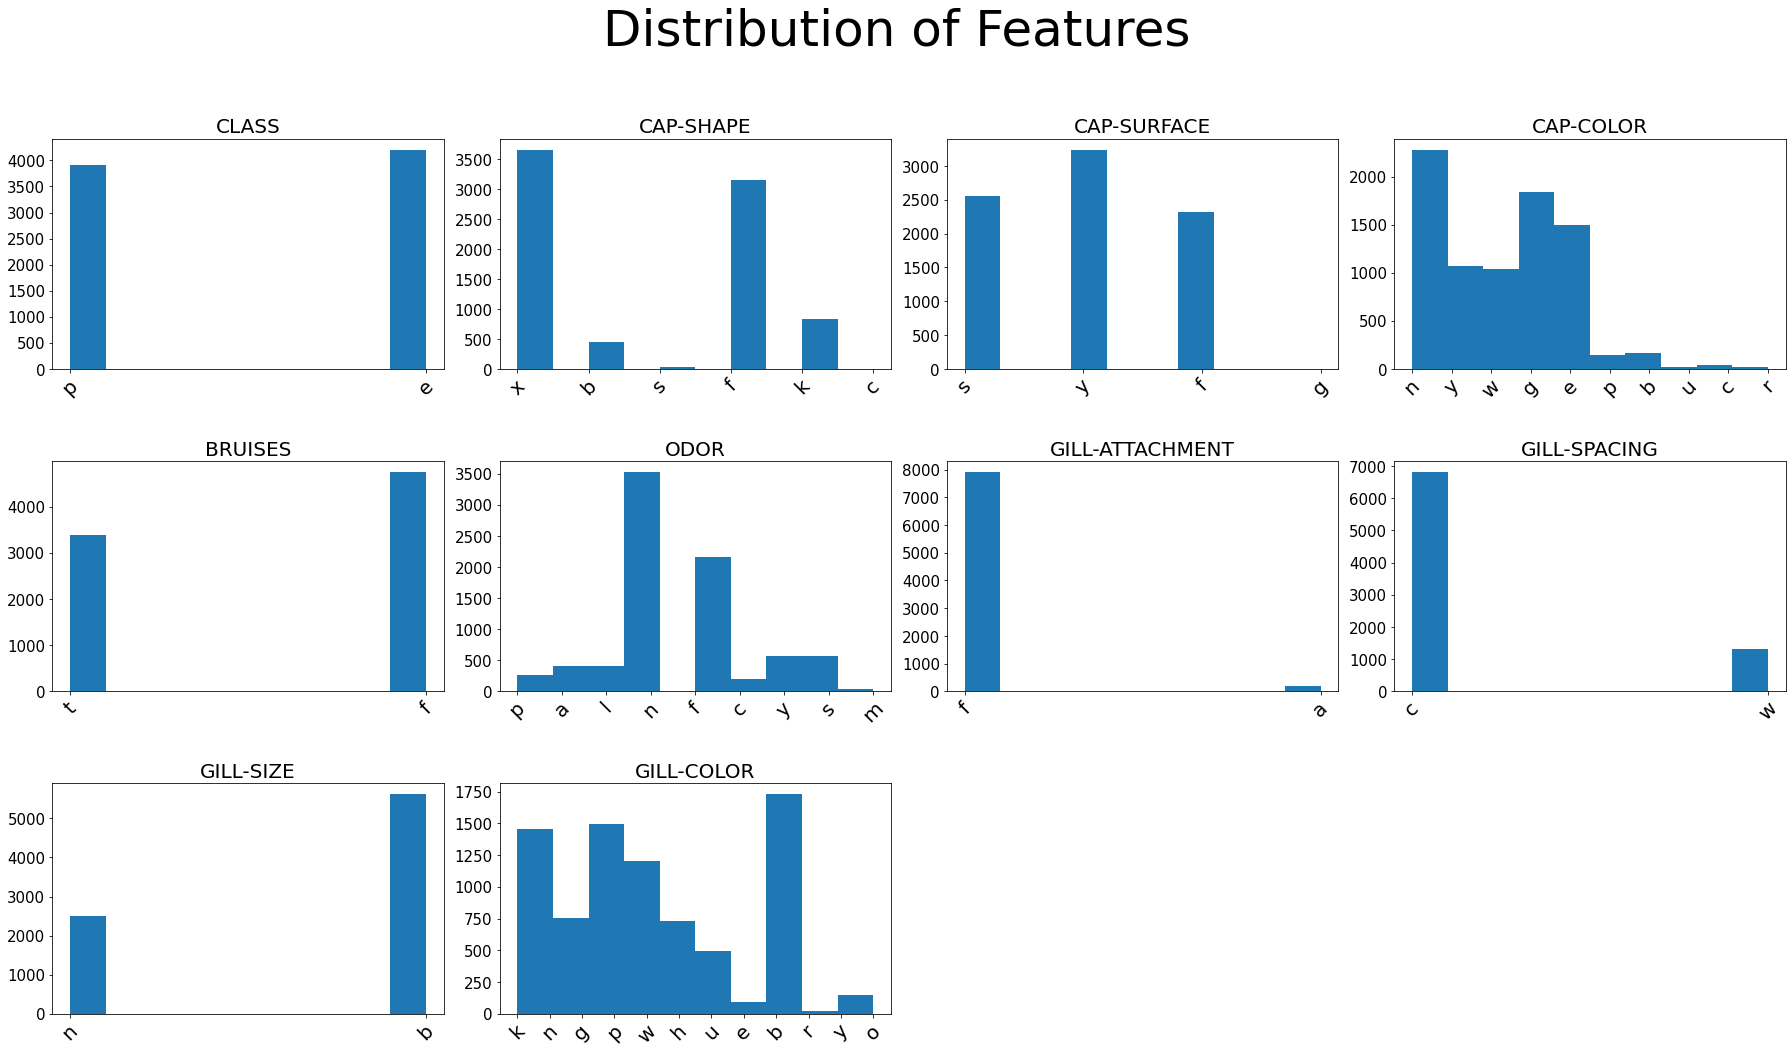

In [15]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")

for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3, 4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

In [39]:
cols= df.columns
cols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [40]:
### Handling Categorical Features
from pyspark.ml.feature import StringIndexer
for col in cols[1:]:
    indexer=StringIndexer(inputCol=col,outputCol=col+"-indexed")
    df=indexer.fit(df).transform(df)
    df = df.withColumn(col+"-indexed", df[col+"-indexed"])
df.show(vertical=True)


-RECORD 0-------------------------------
 class                            | p   
 cap-shape                        | x   
 cap-surface                      | s   
 cap-color                        | n   
 bruises                          | t   
 odor                             | p   
 gill-attachment                  | f   
 gill-spacing                     | c   
 gill-size                        | n   
 gill-color                       | k   
 stalk-shape                      | e   
 stalk-root                       | e   
 stalk-surface-above-ring         | s   
 stalk-surface-below-ring         | s   
 stalk-color-above-ring           | w   
 stalk-color-below-ring           | w   
 veil-type                        | p   
 veil-color                       | w   
 ring-number                      | o   
 ring-type                        | p   
 spore-print-color                | k   
 population                       | s   
 habitat                          | u   
 cap-shape-index

In [41]:
df.columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat',
 'cap-shape-indexed',
 'cap-surface-indexed',
 'cap-color-indexed',
 'bruises-indexed',
 'odor-indexed',
 'gill-attachment-indexed',
 'gill-spacing-indexed',
 'gill-size-indexed',
 'gill-color-indexed',
 'stalk-shape-indexed',
 'stalk-root-indexed',
 'stalk-surface-above-ring-indexed',
 'stalk-surface-below-ring-indexed',
 'stalk-color-above-ring-indexed',
 'stalk-color-below-ring-indexed',
 'veil-type-indexed',
 'veil-color-indexed',
 'ring-number-indexed',
 'ring-type-indexed',
 'spore-print-color-indexed',
 'population-indexed',
 'habitat-indexed']

In [43]:
from pyspark.ml.feature import OneHotEncoder


for col in cols[1:]:
    print(col)
    encoder = OneHotEncoder()\
                .setInputCols([col+'-indexed'])\
                .setOutputCols([col+'-encoded'])

    encoder_model = encoder.fit(df)
    df = encoder_model.transform(df)
df.show(vertical=True)
#encoder_df.toPandas()[['age_udf','age_udfindex','age_encoded']].head()    

cap-shape


IllegalArgumentException: requirement failed: Column cap-shape-encoded already exists.

In [45]:
df.select("cap-shape-indexed").show(vertical=True)

-RECORD 0----------------
 cap-shape-indexed | 0.0 
-RECORD 1----------------
 cap-shape-indexed | 0.0 
-RECORD 2----------------
 cap-shape-indexed | 3.0 
-RECORD 3----------------
 cap-shape-indexed | 0.0 
-RECORD 4----------------
 cap-shape-indexed | 0.0 
-RECORD 5----------------
 cap-shape-indexed | 0.0 
-RECORD 6----------------
 cap-shape-indexed | 3.0 
-RECORD 7----------------
 cap-shape-indexed | 3.0 
-RECORD 8----------------
 cap-shape-indexed | 0.0 
-RECORD 9----------------
 cap-shape-indexed | 3.0 
-RECORD 10---------------
 cap-shape-indexed | 0.0 
-RECORD 11---------------
 cap-shape-indexed | 0.0 
-RECORD 12---------------
 cap-shape-indexed | 3.0 
-RECORD 13---------------
 cap-shape-indexed | 0.0 
-RECORD 14---------------
 cap-shape-indexed | 0.0 
-RECORD 15---------------
 cap-shape-indexed | 4.0 
-RECORD 16---------------
 cap-shape-indexed | 1.0 
-RECORD 17---------------
 cap-shape-indexed | 0.0 
-RECORD 18---------------
 cap-shape-indexed | 0.0 
-RECORD 19--